In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np # linear algebra
import pandas as pd
# from tqdm import tqdm
from tqdm import tqdm_notebook as tqdm
from datetime import date
# tqdm.pandas()
from multiprocessing import Pool
from functools import partial
import Cluster_function as func

In [2]:
data = pd.read_csv('D:\\庫存健診開發\\data\\Stock\\TWSE_Stock.csv', converters={'ts': str, 'StockNo': str, 'StockName': str})
data['ts'] = pd.to_datetime(data['ts'])
data

,StockName,StockNo,close,high,low,open,return,total,ts,vol,On_Date
0,台泥,1101,19.3,19.9,19.1,19.9,NaN,8.756613e+08,2004-02-11,44990547.0,1962-02-09
1,台泥,1101,18.7,19.6,18.4,19.4,-0.6,7.295642e+08,2004-02-12,38283630.0,1962-02-09
2,台泥,1101,20.0,20.0,18.9,19.0,1.3,1.200960e+09,2004-02-13,60809947.0,1962-02-09
3,台泥,1101,21.0,21.4,20.0,20.0,1.0,3.204683e+09,2004-02-16,154068407.0,1962-02-09
4,台泥,1101,21.0,21.3,20.4,21.0,0.0,1.477319e+09,2004-02-17,70709589.0,1962-02-09
...,...,...,...,...,...,...,...,...,...,...,...
2874548,世紀鋼,9958,77.3,78.9,77.1,78.9,-0.2,2.371908e+08,2019-09-17,3050500.0,2008-03-12 00:00:00
2874549,世紀鋼,9958,77.7,79.3,77.5,77.9,0.4,4.648791e+08,2019-09-18,5940537.0,2008-03-12 00:00:00
2874550,世紀鋼,9958,76.3,78.4,76.2,78.4,-1.4,3.086962e+08,2019-09-19,4011923.0,2008-03-12 00:00:00
2874551,世紀鋼,9958,75.8,77.0,75.8,76.6,-0.5,1.328813e+08,2019-09-20,1742684.0,2008-03-12 00:00:00


In [3]:
data_train = data[data['ts'].dt.date < date(2017,9,1)]
df_list = [group[1] for group in data_train.groupby(data_train['StockNo'])]

output_list = []

if __name__ == '__main__':
    with Pool(processes=12) as pool:
        for i, x in enumerate(tqdm(pool.imap_unordered(func.Close_denoise, df_list), total=len(df_list)), 1):
            output_list.append(x)
    
data_train = pd.concat(output_list, axis=0)
data_train

,StockName,StockNo,close,high,low,open,return,total,ts,vol,On_Date,close_normalized,denoised
0,亞泥,1102,22.40,23.00,21.90,23.00,NaN,1.895267e+08,2004-02-11,8444006.0,1962-06-08,0.155405,0.188939
1,亞泥,1102,21.90,22.50,21.30,22.30,-0.50,2.468034e+08,2004-02-12,11195882.0,1962-06-08,0.144144,0.189640
2,亞泥,1102,23.30,23.30,21.50,21.50,1.40,8.446286e+08,2004-02-13,37115038.0,1962-06-08,0.175676,0.190366
3,亞泥,1102,23.70,24.70,23.00,23.30,0.40,1.132873e+09,2004-02-16,47586534.0,1962-06-08,0.184685,0.191118
4,亞泥,1102,24.50,24.50,23.50,23.80,0.80,6.549583e+08,2004-02-17,27383235.0,1962-06-08,0.202703,0.191879
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2343,世紀鋼,9958,9.90,9.99,9.90,9.99,-0.04,1.598506e+06,2017-08-25,161007.0,2008-03-12 00:00:00,0.066946,0.067015
2344,世紀鋼,9958,9.95,9.97,9.90,9.97,0.05,1.315466e+06,2017-08-28,132416.0,2008-03-12 00:00:00,0.067643,0.067031
2345,世紀鋼,9958,9.94,9.96,9.94,9.96,-0.01,7.462800e+05,2017-08-29,75000.0,2008-03-12 00:00:00,0.067503,0.067058
2346,世紀鋼,9958,9.96,9.98,9.95,9.98,0.02,8.787280e+05,2017-08-30,88183.0,2008-03-12 00:00:00,0.067782,0.067084


In [4]:
df = func.Cluster_df(data_train, date(2017,9,1))
df

,台泥,亞泥,嘉泥,環泥,幸福,信大,東泥,味全,味王,大成,...,宏全,信義,裕融,茂順,好樂迪,新麗,潤泰新,三發地產,佳龍,世紀鋼
ts,,,,,,,,,,,,,,,,,,,,,
2004-02-12,0.139777,0.189640,0.486706,0.226725,0.508361,0.463037,0.439737,0.125313,0.343064,0.054841,...,0.448082,0.631796,0.166480,0.170450,0.309594,0.297426,0.062478,NaN,NaN,NaN
2004-02-13,0.139809,0.190366,0.486454,0.226695,0.509362,0.464245,0.439499,0.125639,0.343788,0.055001,...,0.447909,0.632751,0.166434,0.170715,0.309960,0.296902,0.062705,NaN,NaN,NaN
2004-02-16,0.139842,0.191118,0.486194,0.226662,0.510398,0.465496,0.439252,0.125977,0.344538,0.055167,...,0.447731,0.633739,0.166387,0.170989,0.310340,0.296359,0.062942,NaN,NaN,NaN
2004-02-17,0.139875,0.191879,0.485932,0.226629,0.511446,0.466762,0.439003,0.126318,0.345297,0.055334,...,0.447551,0.634739,0.166339,0.171267,0.310725,0.295810,0.063180,NaN,NaN,NaN
2004-02-18,0.139909,0.192655,0.485665,0.226596,0.512512,0.468051,0.438750,0.126666,0.346070,0.055505,...,0.447368,0.635757,0.166291,0.171550,0.311116,0.295251,0.063424,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-25,0.452241,0.247905,0.120728,0.512173,0.319720,0.407290,0.691944,0.213240,0.695653,0.556972,...,0.522585,0.092680,0.913422,0.478671,0.695825,0.105351,0.430632,0.026965,0.031030,0.067015
2017-08-28,0.452149,0.247664,0.120910,0.511411,0.319239,0.407865,0.691490,0.213289,0.695634,0.557181,...,0.521982,0.092508,0.914477,0.478729,0.695421,0.105256,0.430201,0.025606,0.031284,0.067031
2017-08-29,0.452044,0.247523,0.121085,0.510899,0.318911,0.408299,0.691195,0.213336,0.695646,0.557356,...,0.521637,0.092387,0.915359,0.478774,0.695177,0.105162,0.429834,0.024353,0.031477,0.067058


In [9]:
stock_list = df.columns.tolist()

output_list = []

if __name__ == '__main__':
    with Pool(processes=12) as pool:
        for i, x in enumerate(tqdm(pool.imap_unordered(partial(func.Correlation, data=df, all_stocks=stock_list), stock_list), total=len(stock_list)), 1):
            output_list.append(x)
    
CorrMatrix = pd.concat(output_list, axis=1)
CorrMatrix

,台泥,亞泥,信大,東泥,味全,統一,幸福,卜蜂,環泥,嘉泥,...,三發地產,宏全,信義,裕融,好樂迪,茂順,潤泰新,新麗,佳龍,世紀鋼
0,1.000000,0.916859,0.645032,0.769146,0.559171,0.737082,0.243024,0.414157,0.661296,0.315073,...,0.782653,0.489227,-0.065097,0.460355,0.401513,0.521297,0.715986,0.563918,0.014968,0.660462
1,0.916859,1.000000,0.610039,0.594672,0.539525,0.553450,0.269719,0.166422,0.435511,0.558166,...,0.856734,0.373180,0.176916,0.181145,0.180912,0.254674,0.610500,0.544112,0.388298,0.686617
2,0.315073,0.558166,0.399137,-0.111134,0.050457,-0.259126,0.407934,-0.343663,-0.196104,1.000000,...,0.889402,-0.272827,0.838738,-0.545069,-0.562071,-0.341723,-0.096243,0.355163,0.806061,0.648516
3,0.661296,0.435511,0.567244,0.886707,0.380260,0.754388,0.357358,0.682501,1.000000,-0.196104,...,0.695318,0.487614,-0.408306,0.735576,0.613898,0.872056,0.626322,0.541211,-0.458845,0.331787
4,0.243024,0.269719,0.568415,0.370039,-0.221649,0.123794,1.000000,0.267549,0.357358,0.407934,...,-0.381706,-0.275916,0.440537,-0.024755,0.021458,0.294267,-0.042199,0.595099,-0.103635,0.443249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
882,0.563918,0.544112,0.852117,0.495597,0.219457,0.306611,0.595099,0.179699,0.541211,0.355163,...,0.444084,0.090216,0.149488,0.203027,0.138742,0.590074,0.350467,1.000000,-0.105157,0.307403
883,0.715986,0.610500,0.416199,0.799645,0.812073,0.827986,-0.042199,0.386836,0.626322,-0.096243,...,0.950281,0.809679,-0.357172,0.681666,0.578538,0.553649,1.000000,0.350467,-0.226038,0.435187
884,0.782653,0.856734,0.621884,0.645074,0.906953,-0.636803,-0.381706,-0.693256,0.695318,0.889402,...,1.000000,0.649752,0.856164,-0.259054,-0.715399,0.539986,0.950281,0.444084,0.830323,0.809273
885,0.014968,0.388298,-0.144134,-0.500396,0.129525,-0.721474,-0.103635,-0.445621,-0.458845,0.806061,...,0.830323,-0.210241,0.834754,-0.774323,-0.756258,-0.684877,-0.226038,-0.105157,1.000000,0.380499


In [10]:
CorrMatrix.index = df.columns
CorrMatrix = CorrMatrix[CorrMatrix.index.tolist()]
CorrMatrix

,台泥,亞泥,嘉泥,環泥,幸福,信大,東泥,味全,味王,大成,...,宏全,信義,裕融,茂順,好樂迪,新麗,潤泰新,三發地產,佳龍,世紀鋼
台泥,1.000000,0.916859,0.315073,0.661296,0.243024,0.645032,0.769146,0.559171,0.784382,0.777622,...,0.489227,-0.065097,0.460355,0.521297,0.401513,0.563918,0.715986,0.782653,0.014968,0.660462
亞泥,0.916859,1.000000,0.558166,0.435511,0.269719,0.610039,0.594672,0.539525,0.694392,0.823691,...,0.373180,0.176916,0.181145,0.254674,0.180912,0.544112,0.610500,0.856734,0.388298,0.686617
嘉泥,0.315073,0.558166,1.000000,-0.196104,0.407934,0.399137,-0.111134,0.050457,0.078704,0.376355,...,-0.272827,0.838738,-0.545069,-0.341723,-0.562071,0.355163,-0.096243,0.889402,0.806061,0.648516
環泥,0.661296,0.435511,-0.196104,1.000000,0.357358,0.567244,0.886707,0.380260,0.662320,0.422143,...,0.487614,-0.408306,0.735576,0.872056,0.613898,0.541211,0.626322,0.695318,-0.458845,0.331787
幸福,0.243024,0.269719,0.407934,0.357358,1.000000,0.568415,0.370039,-0.221649,0.191483,0.132867,...,-0.275916,0.440537,-0.024755,0.294267,0.021458,0.595099,-0.042199,-0.381706,-0.103635,0.443249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
新麗,0.563918,0.544112,0.355163,0.541211,0.595099,0.852117,0.495597,0.219457,0.414621,0.342083,...,0.090216,0.149488,0.203027,0.590074,0.138742,1.000000,0.350467,0.444084,-0.105157,0.307403
潤泰新,0.715986,0.610500,-0.096243,0.626322,-0.042199,0.416199,0.799645,0.812073,0.818280,0.600180,...,0.809679,-0.357172,0.681666,0.553649,0.578538,0.350467,1.000000,0.950281,-0.226038,0.435187
三發地產,0.782653,0.856734,0.889402,0.695318,-0.381706,0.621884,0.645074,0.906953,0.444051,0.074717,...,0.649752,0.856164,-0.259054,0.539986,-0.715399,0.444084,0.950281,1.000000,0.830323,0.809273
佳龍,0.014968,0.388298,0.806061,-0.458845,-0.103635,-0.144134,-0.500396,0.129525,0.168437,0.743615,...,-0.210241,0.834754,-0.774323,-0.684877,-0.756258,-0.105157,-0.226038,0.830323,1.000000,0.380499


In [11]:
CorrMatrix.to_csv('D:\\庫存健診開發\\data\\Clustering\\Correlation_matrix.csv', index=True)

In [12]:
CorrMatrix = pd.read_csv('D:\\庫存健診開發\\data\\Clustering\\Correlation_matrix.csv', index_col=0)
CorrMatrix

,台泥,亞泥,嘉泥,環泥,幸福,信大,東泥,味全,味王,大成,...,宏全,信義,裕融,茂順,好樂迪,新麗,潤泰新,三發地產,佳龍,世紀鋼
台泥,1.000000,0.916859,0.315073,0.661296,0.243024,0.645032,0.769146,0.559171,0.784382,0.777622,...,0.489227,-0.065097,0.460355,0.521297,0.401513,0.563918,0.715986,0.782653,0.014968,0.660462
亞泥,0.916859,1.000000,0.558166,0.435511,0.269719,0.610039,0.594672,0.539525,0.694392,0.823691,...,0.373180,0.176916,0.181145,0.254674,0.180912,0.544112,0.610500,0.856734,0.388298,0.686617
嘉泥,0.315073,0.558166,1.000000,-0.196104,0.407934,0.399137,-0.111134,0.050457,0.078704,0.376355,...,-0.272827,0.838738,-0.545069,-0.341723,-0.562071,0.355163,-0.096243,0.889402,0.806061,0.648516
環泥,0.661296,0.435511,-0.196104,1.000000,0.357358,0.567244,0.886707,0.380260,0.662320,0.422143,...,0.487614,-0.408306,0.735576,0.872056,0.613898,0.541211,0.626322,0.695318,-0.458845,0.331787
幸福,0.243024,0.269719,0.407934,0.357358,1.000000,0.568415,0.370039,-0.221649,0.191483,0.132867,...,-0.275916,0.440537,-0.024755,0.294267,0.021458,0.595099,-0.042199,-0.381706,-0.103635,0.443249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
新麗,0.563918,0.544112,0.355163,0.541211,0.595099,0.852117,0.495597,0.219457,0.414621,0.342083,...,0.090216,0.149488,0.203027,0.590074,0.138742,1.000000,0.350467,0.444084,-0.105157,0.307403
潤泰新,0.715986,0.610500,-0.096243,0.626322,-0.042199,0.416199,0.799645,0.812073,0.818280,0.600180,...,0.809679,-0.357172,0.681666,0.553649,0.578538,0.350467,1.000000,0.950281,-0.226038,0.435187
三發地產,0.782653,0.856734,0.889402,0.695318,-0.381706,0.621884,0.645074,0.906953,0.444051,0.074717,...,0.649752,0.856164,-0.259054,0.539986,-0.715399,0.444084,0.950281,1.000000,0.830323,0.809273
佳龍,0.014968,0.388298,0.806061,-0.458845,-0.103635,-0.144134,-0.500396,0.129525,0.168437,0.743615,...,-0.210241,0.834754,-0.774323,-0.684877,-0.756258,-0.105157,-0.226038,0.830323,1.000000,0.380499


In [13]:
clusters = [i for i in range(2, 31)]
Kmeans_Result, Kmeans_metrics, K_means = func.Cluster(CorrMatrix, method='Kmeans', cluster_list=clusters)
Kmedians_Result, Kmedians_metrics, K_medians = func.Cluster(CorrMatrix, method='Kmedians', cluster_list=clusters)
Hierarchical_Result, Hierarchical_metrics, Hierarchical = func.Cluster(CorrMatrix, method='Hierarchical', cluster_list=clusters)

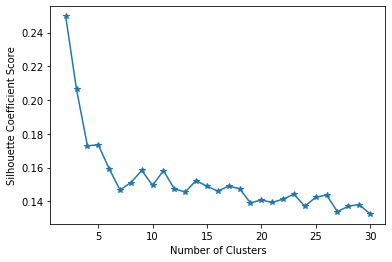

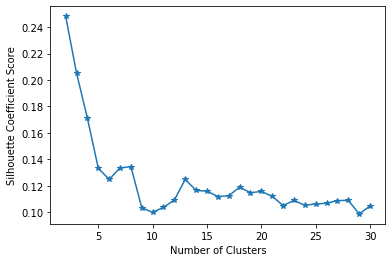

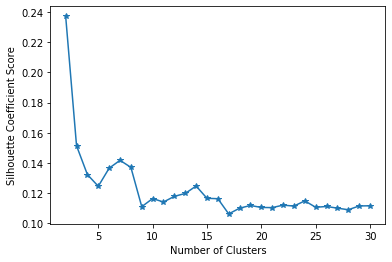

In [14]:
for method in [Kmeans_metrics, Kmedians_metrics, Hierarchical_metrics]:
    plt.figure()
    plt.plot(clusters, method, '*-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Coefficient Score')
    plt.show() 

In [17]:
df_list = []
for i, c in enumerate(tqdm(clusters, total=len(clusters))):
    d = func.ClusterCorrMatrix(Kmeans_Result, CorrMatrix, c)
    df_list.append(d)

In [18]:
count = []
for d in df_list:
    i = 0
    for col in d.columns:
        if d[d[col] == d[col].max()].index == col:
            i += 1
        else:
            continue
    ratio = i/len(d)
    count.append(ratio)

In [19]:
count

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.8571428571428571,
 0.75,
 1.0,
 1.0,
 1.0,
 0.8333333333333334,
 0.9230769230769231,
 0.9285714285714286,
 0.8666666666666667,
 0.875,
 0.8823529411764706,
 0.8333333333333334,
 0.8947368421052632,
 0.9,
 0.8571428571428571,
 0.8636363636363636,
 0.9130434782608695,
 0.7916666666666666,
 0.8,
 0.6923076923076923,
 0.7407407407407407,
 0.7142857142857143,
 0.6896551724137931,
 0.8]

In [24]:
df_list[7]

,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5,Cluster_6,Cluster_7,Cluster_8,Cluster_9
Cluster_1,0.565229,-0.150363,-0.210604,0.364106,0.547873,0.213902,0.0261399,0.0591289,0.235715
Cluster_2,-0.150363,0.59518,0.06025,-0.328837,0.200037,0.213772,-0.277624,0.342086,0.412619
Cluster_3,-0.210604,0.06025,0.505105,0.241421,-0.455503,0.159596,-0.183904,0.234222,-0.271248
Cluster_4,0.364106,-0.328837,0.241421,0.655097,-0.0869506,0.266561,-0.0620837,0.137788,-0.268436
Cluster_5,0.547873,0.200037,-0.455503,-0.0869506,0.69697,0.199866,0.102156,-0.0268498,0.587648
Cluster_6,0.213902,0.213772,0.159596,0.266561,0.199866,0.402822,-0.181212,0.294536,0.127271
Cluster_7,0.0261399,-0.277624,-0.183904,-0.0620837,0.102156,-0.181212,0.542936,-0.442295,-0.0463218
Cluster_8,0.0591289,0.342086,0.234222,0.137788,-0.0268498,0.294536,-0.442295,0.591513,0.116405
Cluster_9,0.235715,0.412619,-0.271248,-0.268436,0.587648,0.127271,-0.0463218,0.116405,0.599547


In [26]:
Kmeans_Result.groupby(Kmeans_Result['9']).size()

9
0    115
1    138
2     82
3    160
4     56
5    115
6     31
7     25
8    165
dtype: int64

In [27]:
centroid_1 = K_means[7].cluster_centers_.tolist()
centroid_2 = K_means[8].cluster_centers_.tolist()
centroid_3 = K_means[11].cluster_centers_.tolist()

In [28]:
df_list.extend([count, centroid_1, centroid_2, centroid_3])

In [29]:
import pickle
with open(f'D:\\庫存健診開發\\data\\Clustering\\Cluster_performance_denoised', 'wb') as fp:
    pickle.dump(df_list, fp)

In [30]:
Kmeans_Result.to_csv('D:\\庫存健診開發\\data\\Clustering\\Cluster_data_Kmeans_denoised.csv', index=True)
Kmedians_Result.to_csv('D:\\庫存健診開發\\data\\Clustering\\Cluster_data_Kmedians_denoised.csv', index=True)

In [31]:
with open(f'D:\\庫存健診開發\\data\\Clustering\\Cluster_performance_denoised', 'rb') as fp:
    load_list = pickle.load(fp)

In [5]:
Cluster_df = pd.read_csv('D:\\庫存健診開發\\data\\Clustering\\Cluster_data_Kmeans_denoised.csv', index_col=0)
Cluster_df

,2,3,4,5,6,7,8,9,10,11,...,21,22,23,24,25,26,27,28,29,30
台泥,1,2,1,2,3,5,3,0,4,1,...,12,16,7,0,3,3,1,20,8,25
亞泥,0,2,2,3,0,5,3,0,0,6,...,17,2,17,0,5,9,15,11,14,3
嘉泥,0,1,0,1,4,2,0,8,1,4,...,20,5,13,16,7,18,8,6,1,1
環泥,1,2,1,2,3,0,6,3,4,1,...,5,1,2,15,8,10,7,10,6,24
幸福,1,0,3,4,1,6,1,5,3,5,...,10,13,21,22,23,19,14,23,0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
新麗,1,2,1,2,3,5,3,5,4,1,...,10,13,21,19,23,19,14,1,0,13
潤泰新,1,2,1,2,3,5,3,0,4,1,...,12,16,7,0,3,3,1,20,8,25
三發地產,0,1,2,3,0,4,5,4,6,3,...,11,14,11,5,4,5,0,8,13,12
佳龍,0,1,0,1,4,2,0,8,1,4,...,3,15,13,21,2,12,26,26,25,28


In [6]:
data_test = data[data['ts'].dt.date >= date(2017,9,1)]
df_list = [group[1] for group in data_test.groupby(data_test['StockNo'])]

output_list = []

if __name__ == '__main__':
    with Pool(processes=12) as pool:
        for i, x in enumerate(tqdm(pool.imap_unordered(func.Close_denoise, df_list), total=len(df_list)), 1):
            output_list.append(x)
    
data_test = pd.concat(output_list, axis=0)
data_test

,StockName,StockNo,close,high,low,open,return,total,ts,vol,On_Date,close_normalized,denoised
0,嘉泥,1103,12.10,12.3,12.05,12.05,0.05,15006484.0,2017-09-01,1233207.0,1969-11-14,0.155405,0.143235
1,嘉泥,1103,12.05,12.2,11.95,12.10,-0.05,11140238.0,2017-09-04,922499.0,1969-11-14,0.148649,0.143207
2,嘉泥,1103,12.10,12.1,11.95,12.00,0.05,8103728.0,2017-09-05,673994.0,1969-11-14,0.155405,0.143181
3,嘉泥,1103,11.85,12.1,11.75,12.00,-0.25,13149191.0,2017-09-06,1101751.0,1969-11-14,0.121622,0.143156
4,嘉泥,1103,11.90,12.0,11.80,11.80,0.05,10786810.0,2017-09-07,904394.0,1969-11-14,0.128378,0.143131
...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,世紀鋼,9958,77.30,78.9,77.10,78.90,-0.20,237190800.0,2019-09-17,3050500.0,2008-03-12 00:00:00,0.747974,0.726113
501,世紀鋼,9958,77.70,79.3,77.50,77.90,0.40,464879118.0,2019-09-18,5940537.0,2008-03-12 00:00:00,0.752415,0.727111
502,世紀鋼,9958,76.30,78.4,76.20,78.40,-1.40,308696223.0,2019-09-19,4011923.0,2008-03-12 00:00:00,0.736871,0.728108
503,世紀鋼,9958,75.80,77.0,75.80,76.60,-0.50,132881305.0,2019-09-20,1742684.0,2008-03-12 00:00:00,0.731320,0.729106


In [7]:
df_test = func.Cluster_df(data_test, date(2019,9,24), date(2007,8,31))
df_test

,台泥,亞泥,嘉泥,環泥,幸福,信大,東泥,味全,味王,大成,...,宏全,信義,裕融,茂順,好樂迪,新麗,潤泰新,三發地產,佳龍,世紀鋼
ts,,,,,,,,,,,,,,,,,,,,,
2017-09-04,0.021095,0.026605,0.143207,0.832402,0.967402,0.047722,0.314600,0.026987,0.026531,0.246626,...,0.700542,0.268955,0.486017,0.536417,0.008609,0.724718,0.062595,0.014151,0.231110,0.008465
2017-09-05,0.019123,0.025850,0.143181,0.835076,0.966954,0.049029,0.313925,0.026760,0.026162,0.251499,...,0.698775,0.271397,0.485648,0.537258,0.008360,0.720411,0.062396,0.014444,0.229524,0.008943
2017-09-06,0.017079,0.025067,0.143156,0.837848,0.966492,0.050386,0.313227,0.026526,0.025781,0.256552,...,0.696944,0.273924,0.485262,0.538132,0.008101,0.715944,0.062188,0.014746,0.227880,0.009443
2017-09-07,0.015011,0.024276,0.143131,0.840652,0.966025,0.051758,0.312521,0.026289,0.025396,0.261663,...,0.695092,0.276480,0.484871,0.539016,0.007839,0.711427,0.061977,0.015053,0.226216,0.009948
2017-09-08,0.012906,0.023470,0.143106,0.843508,0.965550,0.053156,0.311802,0.026047,0.025005,0.266868,...,0.693205,0.279082,0.484473,0.539916,0.007572,0.706825,0.061763,0.015365,0.224522,0.010463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-17,0.603524,0.784622,0.912323,0.070151,0.101923,0.759486,0.724757,0.556486,0.688109,0.785761,...,0.845278,0.223129,0.636761,0.156272,0.793117,0.400419,0.628574,0.832173,0.743693,0.726113
2019-09-18,0.597212,0.782303,0.916621,0.068249,0.104432,0.757657,0.725444,0.550538,0.687703,0.783004,...,0.847706,0.222753,0.634243,0.154765,0.792429,0.398426,0.629561,0.831768,0.741051,0.727111
2019-09-19,0.591319,0.780240,0.921191,0.066709,0.107306,0.756184,0.726225,0.544295,0.686930,0.779958,...,0.849611,0.222557,0.632054,0.153454,0.791835,0.395760,0.630295,0.831248,0.737134,0.728108


In [33]:
Stock_left = data[~data['StockName'].isin(df.columns.tolist())]['StockName'].unique().tolist()
output_list = []

if __name__ == '__main__':
    with Pool(processes=12) as pool:
        for i, x in enumerate(tqdm(pool.imap_unordered(partial(func.FindCluster, all_df=df_test, cluster_df=Cluster_df), Stock_left), total=len(Stock_left)), 1):
            output_list.append(x)
    
cluster_match = pd.DataFrame(np.stack(output_list, axis=0), columns=['StockName', 'cluster']).set_index('StockName')
cluster_match

,cluster
StockName,
宇隆,6
吉茂,1
富林-KY,2
寶齡富錦,3
亞航,1
凱羿-KY,6
訊映,2
牧德,7
日月光投控,1


In [34]:
All_cluster_df = pd.concat([pd.DataFrame(Cluster_df['9']).rename(columns={'9':'cluster'}), cluster_match], axis=0)
All_cluster_df

,cluster
台泥,0
亞泥,0
嘉泥,8
環泥,3
幸福,5
...,...
柏文,2
商億-KY,3
格威傳媒,3
東哥遊艇,6


In [35]:
cluster = 9
All_cluster_df.to_csv(f'D:\\庫存健診開發\\data\\Clustering\\Cluster{cluster}_labels.csv', index=True)

In [57]:
All_cluster_df.groupby(All_cluster_df['cluster']).size()

cluster
0    115
1    138
2     82
3    160
4     56
5    115
6     31
7     25
8    165
0      1
1      9
2     12
3      6
6     16
7      8
dtype: int64